# <div style="text-align:center; padding:15px; color:white; margin:0; font-size:150%; font-family:'Times New Roman'; background-color:#1DB954; overflow:hidden"><b>Import libraries and load data</b></div>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
from collections import Counter
import nltk
from nltk.corpus import stopwords
import string
from collections import Counter
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from wordcloud import WordCloud
warnings.filterwarnings("ignore")

df=pd.read_csv("/kaggle/input/chatgpt-user-reviews/CHATGPT.csv")
print(df.info())
print(df.isnull().sum())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2292 entries, 0 to 2291
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  2249 non-null   object
 1   label   2292 non-null   object
dtypes: object(2)
memory usage: 35.9+ KB
None
Review    43
label      0
dtype: int64
                                              Review     label
0  up to this point i ’ ve mostly been using chat...  NEGATIVE
1  i ’ ve been a user since it ’ s initial roll o...  NEGATIVE
2  this app would almost be perfect if it wasn ’ ...  NEGATIVE
3  i recently downloaded the app and overall, it'...  POSITIVE
4  i appreciate the devs implementing siri suppor...  NEGATIVE


In [2]:
df = df.dropna(subset=['Review'])
print(df.isnull().sum())

Review    0
label     0
dtype: int64


# <div style="text-align:center; padding:15px; color:white; margin:0; font-size:150%; font-family:'Times New Roman'; background-color:#1DB954; overflow:hidden"><b>Exploratory Data Analysis</b></div>

In [3]:
print(df.describe())

       Review     label
count    2249      2249
unique   2201         2
top     first  NEGATIVE
freq        7      1263


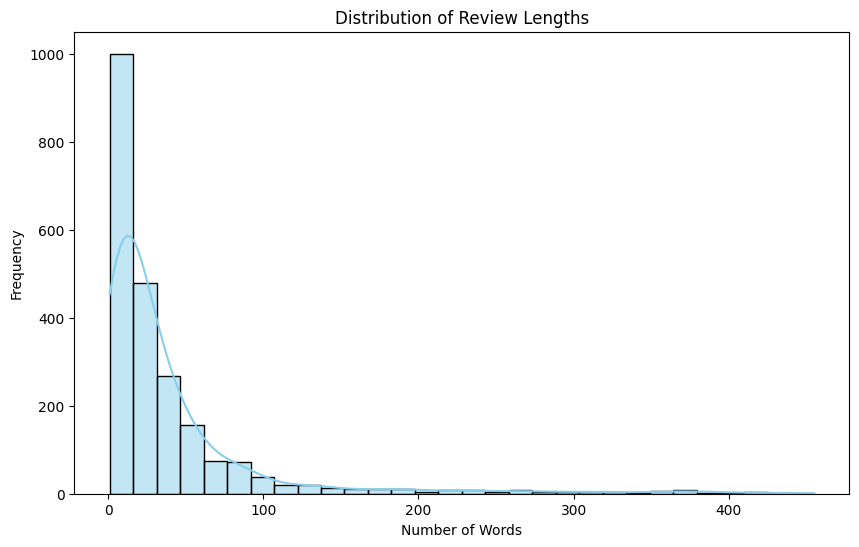

In [4]:
df['review_length'] = df['Review'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='review_length', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


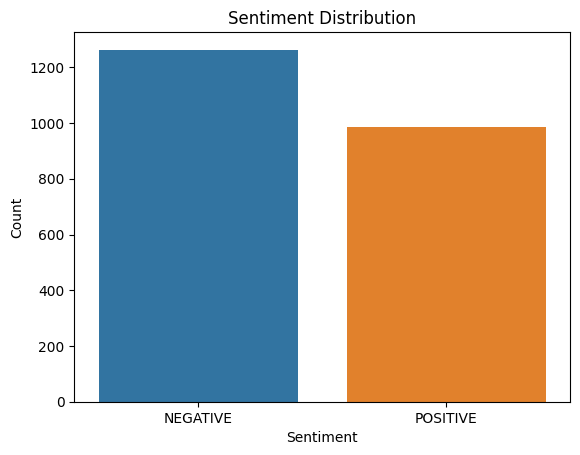

In [5]:
sns.countplot(x='label', data=df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


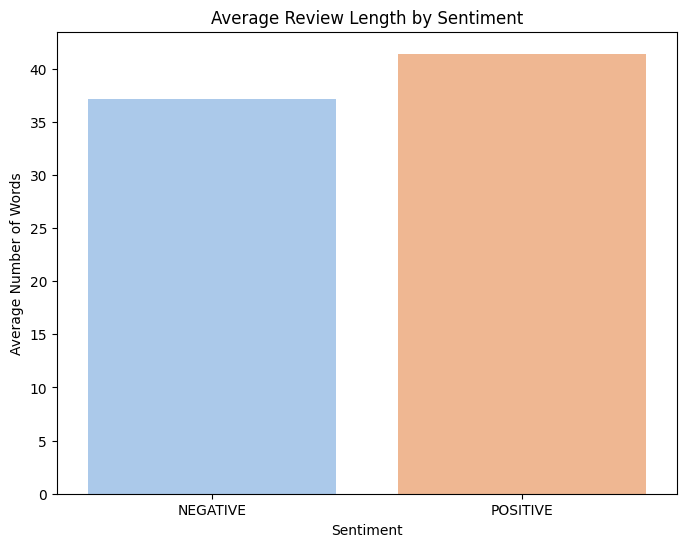

In [6]:
avg_length = df.groupby('label')['review_length'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='label', y='review_length', data=avg_length, palette='pastel')
plt.title('Average Review Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Number of Words')
plt.show()

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


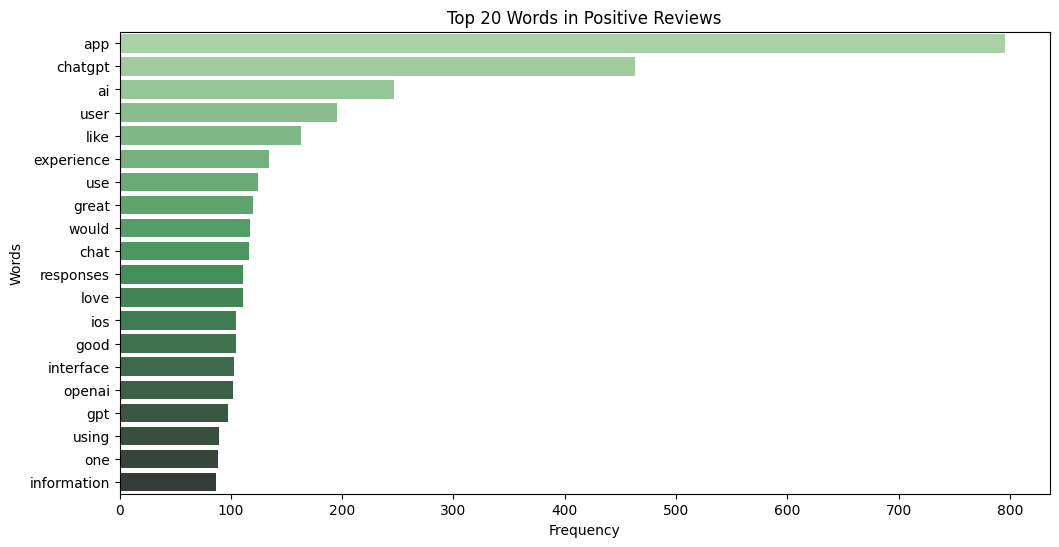

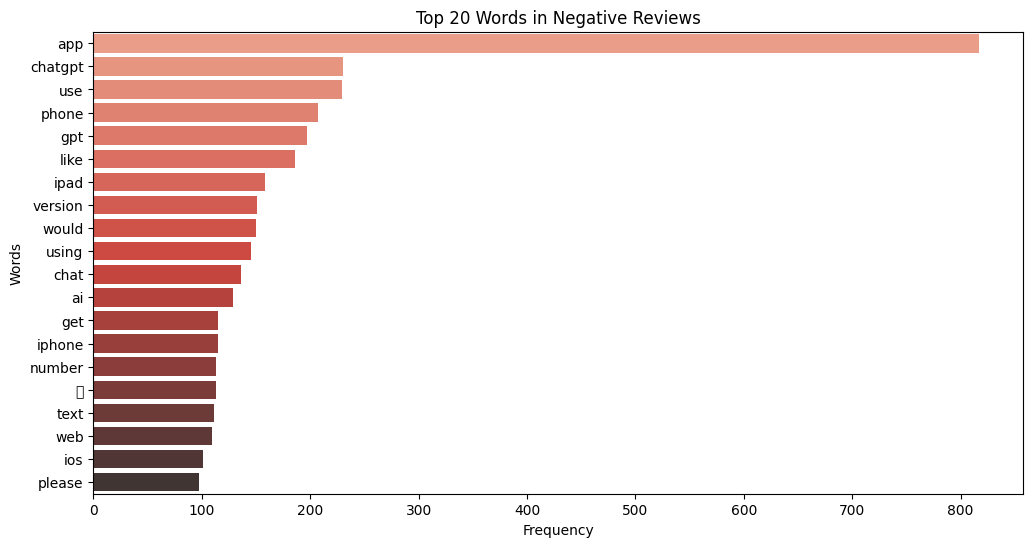

In [7]:
nltk.download('stopwords')
df_clean = df.dropna(subset=['Review'])
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Remove punctuation and non-alphabetical characters
    text = text.lower().translate(str.maketrans('', '', string.punctuation))
    text = ''.join(filter(lambda x: x.isalpha() or x.isspace(), text))
    return text

def get_top_words(text_series, n=20):
    all_words = ' '.join(text_series.apply(clean_text))
    tokens = all_words.split()
    tokens = [word for word in tokens if word not in stop_words]
    counter = Counter(tokens)
    return counter.most_common(n)

# Top words in positive and negative reviews
top_positive = get_top_words(df_clean[df_clean['label'] == 'POSITIVE']['Review'], n=20)
top_negative = get_top_words(df_clean[df_clean['label'] == 'NEGATIVE']['Review'], n=20)

def plot_top_words(top_words, title, color):
    words, counts = zip(*top_words)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(counts), y=list(words), palette=color)
    plt.title(title)
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

# Plotting the top words
plot_top_words(top_positive, 'Top 20 Words in Positive Reviews', 'Greens_d')
plot_top_words(top_negative, 'Top 20 Words in Negative Reviews', 'Reds_d')


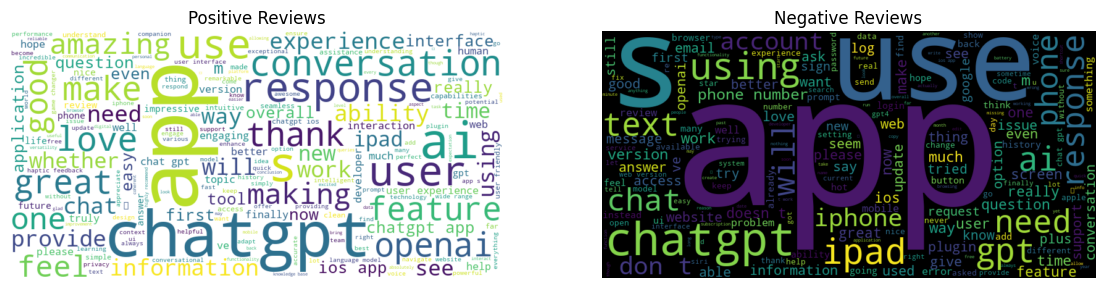

In [8]:
positive_reviews = df[df['label'] == 'POSITIVE']['Review']
negative_reviews = df[df['label'] == 'NEGATIVE']['Review']
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_reviews))
negative_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(negative_reviews))
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Reviews')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Reviews')
plt.axis('off')

plt.show()


# <div style="text-align:center; padding:15px; color:white; margin:0; font-size:150%; font-family:'Times New Roman'; background-color:#1DB954; overflow:hidden"><b>Models</b></div>

### Logistic Regression Classification Report ###
              precision    recall  f1-score   support

    NEGATIVE       0.85      0.89      0.87       249
    POSITIVE       0.86      0.81      0.83       201

    accuracy                           0.85       450
   macro avg       0.85      0.85      0.85       450
weighted avg       0.85      0.85      0.85       450



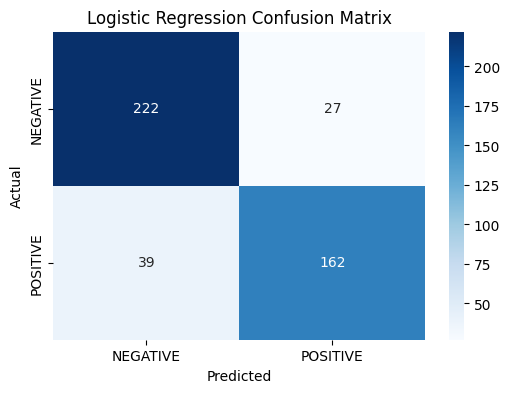

### Multinomial Naive Bayes Classification Report ###
              precision    recall  f1-score   support

    NEGATIVE       0.70      0.96      0.81       249
    POSITIVE       0.91      0.49      0.64       201

    accuracy                           0.75       450
   macro avg       0.80      0.73      0.72       450
weighted avg       0.79      0.75      0.73       450



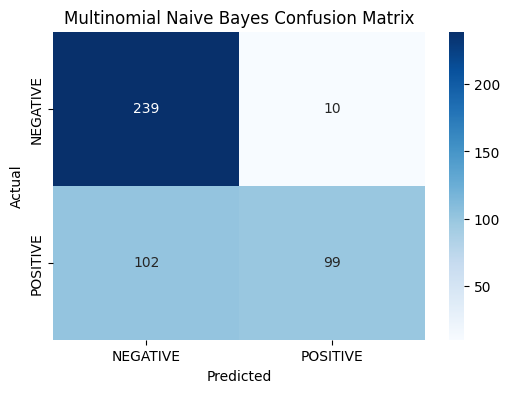

### Support Vector Machine Classification Report ###
              precision    recall  f1-score   support

    NEGATIVE       0.88      0.82      0.85       249
    POSITIVE       0.80      0.86      0.82       201

    accuracy                           0.84       450
   macro avg       0.84      0.84      0.84       450
weighted avg       0.84      0.84      0.84       450



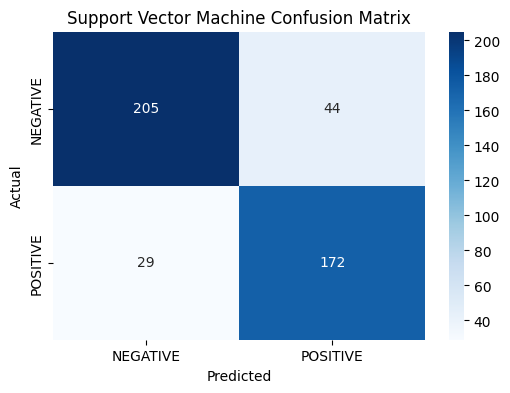

### Random Forest Classification Report ###
              precision    recall  f1-score   support

    NEGATIVE       0.77      0.88      0.83       249
    POSITIVE       0.83      0.68      0.75       201

    accuracy                           0.79       450
   macro avg       0.80      0.78      0.79       450
weighted avg       0.80      0.79      0.79       450



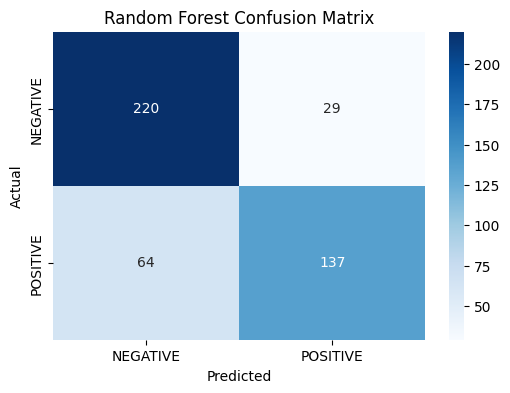

### Gradient Boosting Classification Report ###
              precision    recall  f1-score   support

    NEGATIVE       0.79      0.83      0.81       249
    POSITIVE       0.78      0.72      0.75       201

    accuracy                           0.78       450
   macro avg       0.78      0.78      0.78       450
weighted avg       0.78      0.78      0.78       450



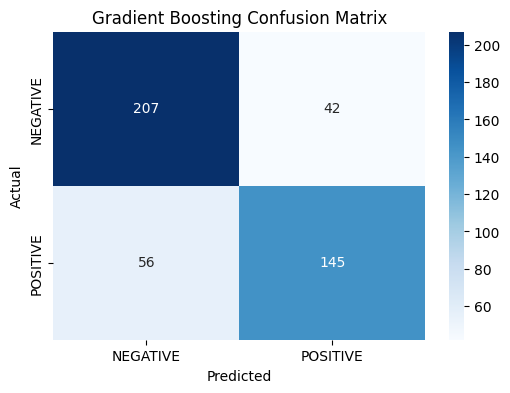

In [9]:
df_clean['Cleaned_Review'] = df_clean['Review'].apply(clean_text)

X = df_clean['Cleaned_Review']
y = df_clean['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"### {model_name} Classification Report ###")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['NEGATIVE', 'POSITIVE'], 
                yticklabels=['NEGATIVE', 'POSITIVE'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Multinomial Naive Bayes': MultinomialNB(),
    'Support Vector Machine': LinearSVC(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

for model_name, model in models.items():
    evaluate_model(model, X_train_vec, X_test_vec, y_train, y_test, model_name)